# Practica: La maldición de la dimensión en Machine Learning 

## Objetivos de la práctica

* Verificar que La distancia media entre los datos aumenta con el número de dimensiones.
* Verificar que la variabilidad de la distancia disminuye exponencialmente con el número 
   de dimensiones. 

### Introducción

¿Sabías que a medida que aumenta el número de dimensiones, la distancia se vuelven un creterio muy debil para hacer clasificaciones? 

A este efecto se le conoce con el nombre de **la Maldición de la Dimensión** y tiene un gran impacto en técnicas de aprendizaje automático basadas en distancias tales como 
* K-Means y 
* KNN (los k vecinos más cercanos).

## Secuencia didáctica	

1. Introducción: La Maldición de la Dimensión  
   1.1 La distancia media aumenta con el número de dimensiones  
   1.2 La variabilidad disminuye exponencialmente  
   1.3 Distribución de distancias a medida que aumenta la dimensión  
2. Intuición Gráfica de la Maldición de la Dimensión  
3. Impacto de la Maldición de la Dimensión en Machine Learning  
4. Mitigando el efecto de la Maldición de la Dimensión  
   4.1 Técnicas de reducción de la dimensionalidad  
   4.2 Aumentar (exponencialmente) la cantidad de datos  
5. Resumen y conclusiones 

## Actividad 1: Verificar que la distancia media aumenta con el número de dimensiones 

La distancia media aumenta con el número de dimensiones  

A medida que el número de dimensiones aumenta, la distancia media entre ellos también aumenta. 

Esto en sí mismo no es muy problemático para el aprendizaje automático. 

### Secuencia de la actividad

* Crear una lista de python `dim` de las dimensiones a considerar.
* Para cada dimensión crear una lista de puntos `p` pertenecientes al intervalo $[0,1]$ y para cada una de estas listas calcular la lista de distancias entre puntos consecutivos utilizando la función `numpy.linalg.norm(p[i] - p[i+1])`
* Para cada lista de distancias calcular el promedio con la función `numpy.mean(distancias)`
* Graficar a la función promedio de distancias `prom_dist` como función de la dimensión `dim`


### Ejecución de la secuencia 

In [23]:
import numpy as np 
dim = [1,2,3,10,100,200,500,800,1000] 
prome_distan = []
for d in dim:
    puntos = np.random.rand(10000,d)
    distancias = [] 
    for j in range(10000-1):
        distancias.append(np.linalg.norm(puntos[j] - puntos[j+1]))  
    prome_distan.append(np.mean(distancias))     

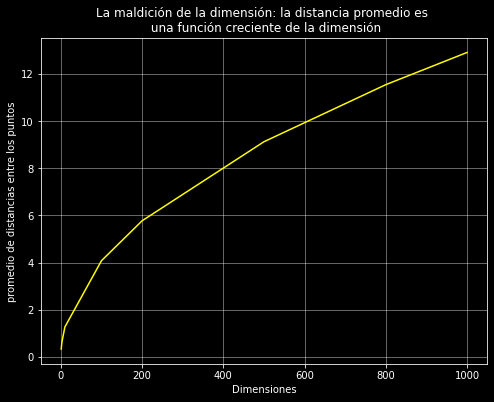

In [37]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(8,6)) 
plt.plot(dim, prome_distan, color = 'yellow')   
plt.grid(True, alpha = 0.5) 
plt.xlabel('Dimensiones')
plt.ylabel('promedio de distancias entre los puntos')
plt.title('La maldición de la dimensión: la distancia promedio es \n una función creciente de la dimensión')
plt.savefig('función_distancia_promedio.png')
plt.show() 

# Cálculo de la distribución de distancia entre dos puntos en una dimensión 

1. Creación de un arreglo de numpy de números aleatorios que distribuyen uniforme y que pertenecen al intervalo $[0,1]$ de la recta real. 

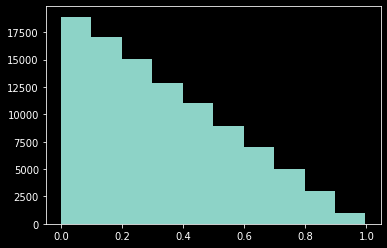

In [4]:
import numpy as np 
p = np.random.rand(100000)
def dist_1(x1,x2):
    return np.abs(x1 - x2) 
d1 = []
for i in range(len(p)-1):
    d1.append(dist_1(p[i],p[i+1])) 
    
import matplotlib.pyplot as plt 
plt.style.use('dark_background') 

plt.hist(d1) 
plt.show()     

1. Creación de un arreglo de numpy de números aleatorios que distribuyen uniforme y que pertenecen al intervalo $[0,1]$ de $\mathbb{R}^{2}$. 

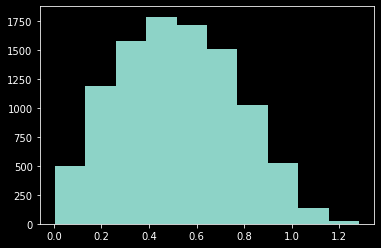

In [5]:
import numpy as np 
a = np.random.rand(100000,2) 
def dist_2(c,d):
    return np.linalg.norm(c-d)  
d1 = []
for i in range(10000-1):
    d1.append(dist_2(a[i,:],a[i-1,:])) 
    
import matplotlib.pyplot as plt 
plt.style.use('dark_background') 

plt.hist(d1) 
plt.show()     

## Distribución de distancias en tres dimensiones 

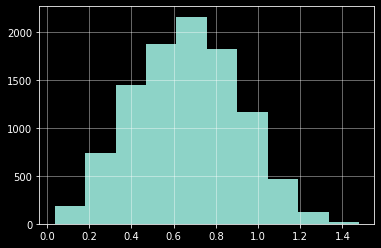

In [6]:
import numpy as np 
d = 3
puntos = np.random.rand(10000,d) 
def dist(c,d):
    return np.linalg.norm(c-d)  
distri = []
for i in range(10000-1):
    distri.append(dist(puntos[i,:],puntos[i+1,:])) 
    
import matplotlib.pyplot as plt 
plt.style.use('dark_background') 

plt.hist(distri) 
plt.grid(True, alpha = 0.5)  
plt.show()    

## Distribución de distancias en diez dimensiones 

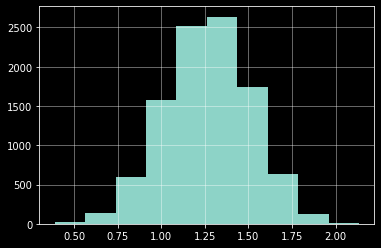

In [7]:
import numpy as np 
d = 10 
puntos = np.random.rand(10000,d) 
def dist(c,d):
    return np.linalg.norm(c-d)  
distri = []
for i in range(10000-1):
    distri.append(dist(puntos[i,:],puntos[i+1,:])) 
    
import matplotlib.pyplot as plt 
plt.style.use('dark_background') 

plt.hist(distri) 
plt.grid(True, alpha = 0.5)  
plt.show()    

## Distribución de distancias en $50$ dimensiones 

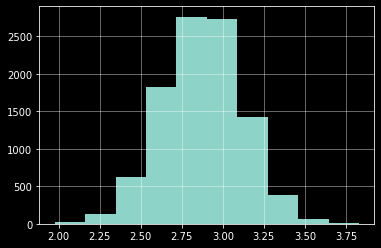

In [15]:
import numpy as np 
d = 50 
puntos = np.random.rand(10000,d) 
def dist(c,d):
    return np.linalg.norm(c-d)  
distri = []
for i in range(10000-1):
    distri.append(dist(puntos[i,:],puntos[i+1,:])) 
    
import matplotlib.pyplot as plt 
plt.style.use('dark_background') 

plt.hist(distri) 
plt.grid(True, alpha = 0.5)  
plt.show()    

## Distribución de distancias en $100$ dimensiones 

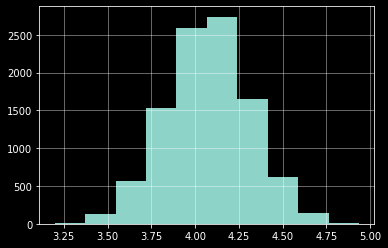

In [16]:
import numpy as np 
d = 100 
puntos = np.random.rand(10000,d) 
def dist(c,d):
    return np.linalg.norm(c-d)  
distri = []
for i in range(10000-1):
    distri.append(dist(puntos[i,:],puntos[i+1,:])) 
    
import matplotlib.pyplot as plt 
plt.style.use('dark_background') 

plt.hist(distri) 
plt.grid(True, alpha = 0.5)  
plt.show()    

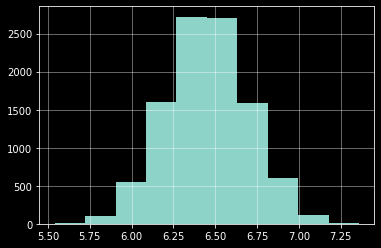

In [17]:
import numpy as np 
d = 250  
puntos = np.random.rand(10000,d) 
def dist(c,d):
    return np.linalg.norm(c-d)  
distri = []
for i in range(10000-1):
    distri.append(dist(puntos[i,:],puntos[i+1,:])) 
    
import matplotlib.pyplot as plt 
plt.style.use('dark_background') 

plt.hist(distri) 
plt.grid(True, alpha = 0.5)  
plt.show()    

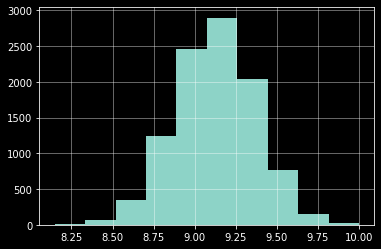

In [18]:
import numpy as np 
d = 500 
puntos = np.random.rand(10000,d) 
def dist(c,d):
    return np.linalg.norm(c-d)  
distri = []
for i in range(10000-1):
    distri.append(dist(puntos[i,:],puntos[i+1,:])) 
    
import matplotlib.pyplot as plt 
plt.style.use('dark_background') 

plt.hist(distri) 
plt.grid(True, alpha = 0.5)  
plt.show()    

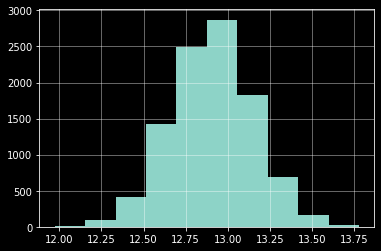

In [19]:
import numpy as np 
d = 1000  
puntos = np.random.rand(10000,d) 
def dist(c,d):
    return np.linalg.norm(c-d)  
distri = []
for i in range(10000-1):
    distri.append(dist(puntos[i,:],puntos[i+1,:])) 
    
import matplotlib.pyplot as plt 
plt.style.use('dark_background') 

plt.hist(distri) 
plt.grid(True, alpha = 0.5)  
plt.show()    

# Mosaico de graficos de distribución de distancias en orden creciente de dimensión

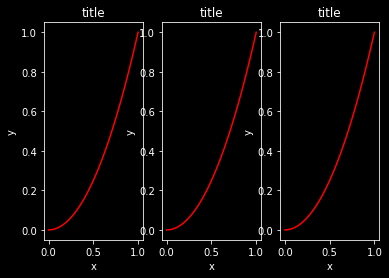

In [35]:
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use('dark_background') 

x = np.linspace(0,1)
y = x**2

fig, axes = plt.subplots(nrows = 1, ncols = 3)

for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

In [36]:
list(enumerate(axes)) 

[(0, <matplotlib.axes._subplots.AxesSubplot at 0x213734eeb48>),
 (1, <matplotlib.axes._subplots.AxesSubplot at 0x213735560c8>),
 (2, <matplotlib.axes._subplots.AxesSubplot at 0x2137358b8c8>)]

## Referencias 

* https://www.iartificial.net/la-maldicion-de-la-dimension-en-machine-learning/
  [La Maldición de la Dimensión en Machine Learning](https://www.iartificial.net/la-maldicion-de-la-dimension-en-machine-learning/)